In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from loguru import logger
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import regex
import numpy as np
import emoji
import os
import plotly.express as px
import plotly.io as pio
import plotly.subplots as sp
import plotly.graph_objects as go
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import datetime
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a427617\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
processed = Path(r"C:/Users/a427617/Documents/Master Data science/Blok 3 - Data mining/Data-Mining---2024/data/processed")
print(processed)
datafile = processed / "whatsapp-20240214-112323.parq"
print(datafile)
if not datafile.exists():
    logger.warning("Datafile does not exist. First run src/preprocess.py, and check the timestamp!")

df = pd.read_parquet(datafile)
print(df.dtypes)

C:\Users\a427617\Documents\Master Data science\Blok 3 - Data mining\Data-Mining---2024\data\processed
C:\Users\a427617\Documents\Master Data science\Blok 3 - Data mining\Data-Mining---2024\data\processed\whatsapp-20240214-112323.parq
timestamp         datetime64[ns]
author                    object
message                   object
has_emoji                   bool
message_length             int64
has_link                    bool
hour                      object
day_of_week                int32
dtype: object


In [8]:
def create_author_messages_over_time_plot(df):
    # Convert Period to string for 'year_month'
    df['year_month'] = df['timestamp'].dt.to_period('M').astype(str)
    
    # Group by year_month and author, and calculate the count
    author_grouped_msg = (df.groupby(['year_month', 'author'])['message']
                          .count()
                          .reset_index(name='count'))

    # Create a line plot using Plotly Express
    fig = px.line(author_grouped_msg, x='year_month', y='count', color='author',
                  line_group='author', labels={'count': 'Number of Messages'},
                  template='plotly_dark', title='Messages per Author Over Time')

    # Customize the figure
    fig.update_layout(
        xaxis=dict(title='Timeline'),
        yaxis=dict(title='Number of Messages'),
        showlegend=True
    )

    return fig

# Example usage:
# Assuming 'df' is your DataFrame
fig = create_author_messages_over_time_plot(df)
fig.show()

In [78]:
def create_bbq_mentions_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract month and year from timestamp
    df['month_year'] = df['timestamp'].dt.to_period('M').astype(str)

    # Define a regex pattern to search for mentions of "BBQ" or "bbq" in the 'message' column
    bbq_pattern = re.compile(r'\b(?:BBQ|Bbq|bbq|barbecue|barbeque|bbq\'en|bbq\'ing)\b', re.IGNORECASE)

    # Count occurrences of "BBQ" or "bbq" in each message
    df['bbq_mentions'] = df['message'].apply(lambda x: len(bbq_pattern.findall(x)))

    # Group by month_year and calculate the total number of BBQ mentions
    bbq_mentions_over_time = df.groupby('month_year')['bbq_mentions'].sum().reset_index()

    # Create a line plot using Plotly Express
    fig = px.line(bbq_mentions_over_time, x='month_year', y='bbq_mentions',
                  template='plotly_dark', title='BBQ Mentions Over Time (Grouped by Month)',
                  labels={'bbq_mentions': 'Number of Mentions'},
                  category_orders={'month_year': sorted(bbq_mentions_over_time['month_year'])})

    # Customize the figure
    fig.update_layout(
        xaxis=dict(title='Timeline'),
        yaxis=dict(title='Number of BBQ Mentions'),
        showlegend=True
    )

    return fig


# Example usage:
# Assuming 'df' is your DataFrame
fig = create_bbq_mentions_over_time_plot(df)
fig.show()

In [9]:

def create_bbq_mentions_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract year from timestamp
    df['year'] = df['timestamp'].dt.year

    # Define a regex pattern to search for mentions of "BBQ" or "bbq" in the 'message' column
    bbq_pattern = re.compile(r'\b(?:BBQ|Bbq|bbq|barbecue|barbeque|bbq\'en|bbq\'ing)\b', re.IGNORECASE)

    # Count occurrences of "BBQ" or "bbq" in each message
    df['bbq_mentions'] = df['message'].apply(lambda x: len(bbq_pattern.findall(x)))

    # Group by year and calculate the average number of BBQ mentions
    bbq_mentions_over_time = df.groupby('year')['bbq_mentions'].mean().reset_index()

    # Create a line plot using Plotly Express
    fig = px.line(bbq_mentions_over_time, x='year', y='bbq_mentions',
                  template='plotly_dark', title='Average BBQ Mentions Over Time (Grouped by Year)',
                  labels={'bbq_mentions': 'Average Number of Mentions'},
                  category_orders={'year': sorted(bbq_mentions_over_time['year'])}, 
                  color_discrete_sequence={'Win': 'green', 'Lose': 'red', 'Draw': 'blue'})  

    # Customize the figure
    fig.update_layout(
        xaxis=dict(title='Timeline'),
        yaxis=dict(title='Average Number of BBQ Mentions'),
        showlegend=True
    )

    return fig


# Example usage:
# Assuming 'df' is your DataFrame
fig = create_bbq_mentions_over_time_plot(df)
fig.show()

KeyError: 0

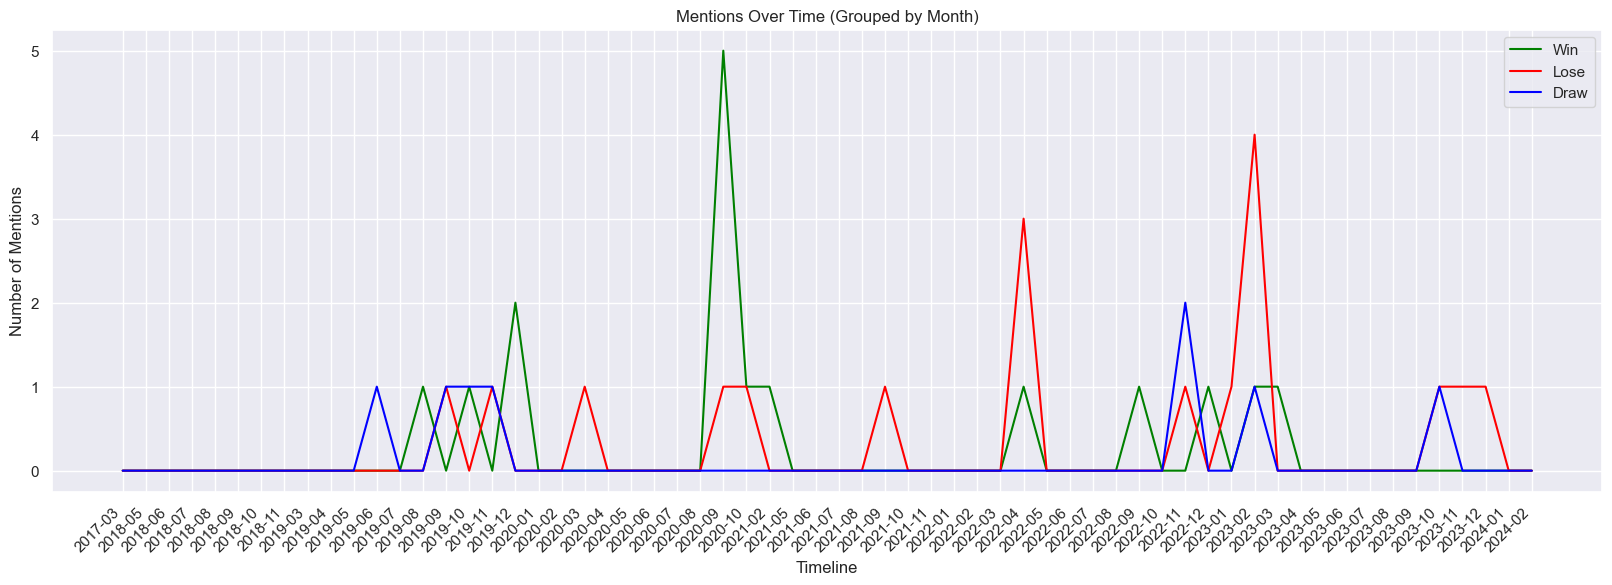

In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def create_mentions_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract month and year from timestamp
    df['month_year'] = df['timestamp'].dt.to_period('M').astype(str)

    # Define regex patterns for each word category
    word_patterns = {
        'Win': re.compile(r'\b(?:Win|winst|gewonnen)\b', re.IGNORECASE),
        'Lose': re.compile(r'\b(?:Lose|verloren)\b', re.IGNORECASE),
        'Draw': re.compile(r'\b(?:Gelijk|gelijkspel)\b', re.IGNORECASE)
    }

    # Count occurrences of each word category in each message
    for category, pattern in word_patterns.items():
        df[f'{category}_mentions'] = df['message'].apply(lambda x: len(pattern.findall(x)))

    # Group by month_year and calculate the total number of mentions for each word category
    mentions_over_time = df.groupby('month_year')[[f'{category}_mentions' for category in word_patterns]].sum().reset_index()

    # Set specific line colors for each category
    color_palette = {'Win': 'green', 'Lose': 'red', 'Draw': 'blue'}

    # Set the seaborn style
    sns.set(style="darkgrid")

    # Create a line plot using Seaborn
    plt.figure(figsize=(20, 6))
    for category in word_patterns.keys():
        sns.lineplot(data=mentions_over_time, x='month_year', y=f'{category}_mentions', label=category, color=color_palette[category])

    # Customize the plot
    plt.title('Mentions Over Time (Grouped by Month)')
    plt.xlabel('Timeline')
    plt.ylabel('Number of Mentions')
    plt.legend()

    # Set x-axis ticks to every 1 month
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.gca().set_xticks(mentions_over_time['month_year'])
    plt.show()


# Example usage:
# Assuming 'df' is your DataFrame
create_mentions_over_time_plot(df)



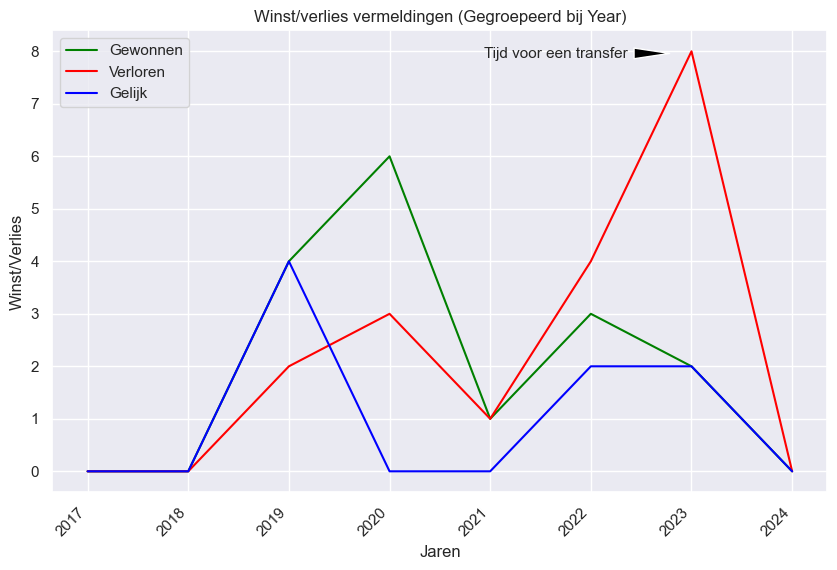

In [34]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def create_mentions_over_time_plot(df, interval='year'):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract month, year, or both from timestamp based on the specified interval
    if interval == 'month':
        df['time_interval'] = df['timestamp'].dt.to_period('M').astype(str)
    elif interval == 'year':
        df['time_interval'] = df['timestamp'].dt.to_period('Y').astype(str)
    else:
        raise ValueError("Invalid interval. Supported values are 'month' and 'year'.")

    # Define regex patterns for each word category
    word_patterns = {
        'Gewonnen': re.compile(r'\b(?:Win|winst|gewonnen)\b', re.IGNORECASE),
        'Verloren': re.compile(r'\b(?:Lose|verloren)\b', re.IGNORECASE),
        'Gelijk': re.compile(r'\b(?:Gelijk|gelijkspel)\b', re.IGNORECASE)
    }

    # Count occurrences of each word category in each message
    for category, pattern in word_patterns.items():
        df[f'{category}_mentions'] = df['message'].apply(lambda x: len(pattern.findall(x)))

    # Group by time_interval and calculate the total number of mentions for each word category
    mentions_over_time = df.groupby('time_interval')[[f'{category}_mentions' for category in word_patterns]].sum().reset_index()

    # Set specific line colors for each category
    color_palette = {'Gewonnen': 'green', 'Verloren': 'red', 'Gelijk': 'blue'}

    # Set the seaborn style
    sns.set(style="darkgrid")

    # Create a line plot using Seaborn
    plt.figure(figsize=(10, 6))
    for category in word_patterns.keys():
        sns.lineplot(data=mentions_over_time, x='time_interval', y=f'{category}_mentions', label=category, color=color_palette[category])

    # Customize the plot
    plt.title(f'Winst/verlies vermeldingen (Gegroepeerd bij {interval.capitalize()})')
    plt.xlabel('Jaren')
    plt.ylabel('Winst/Verlies')
    plt.legend()

    # Set x-axis ticks to every 1 unit of the specified interval
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.gca().set_xticks(mentions_over_time['time_interval'])

    plt.annotate('Tijd voor een transfer', xy=(0.80, 0.95), xytext=(0.65, 0.95),
                 xycoords='axes fraction', textcoords='axes fraction',
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=1),
                 fontsize=11, ha='center', va='center')
    
    plt.savefig(r"C:/Users/a427617/Documents/Master Data science/Blok 3 - Data mining/Data-Mining---2024/img/Gewonnen_verloren.png")
    plt.show()



# Example usage:
# Assuming 'df' is your DataFrame
create_mentions_over_time_plot(df, interval='year')


In [79]:
def create_bbq_mentions_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract year from timestamp
    df['month'] = df['timestamp'].dt.month

    # Define a regex pattern to search for mentions of "BBQ" or "bbq" in the 'message' column
    bbq_pattern = re.compile(r'\b(?:BBQ|Bbq|bbq|barbecue|barbeque|bbq\'en|bbq\'ing)\b', re.IGNORECASE)

    # Count occurrences of "BBQ" or "bbq" in each message
    df['bbq_mentions'] = df['message'].apply(lambda x: len(bbq_pattern.findall(x)))

    # Group by year and calculate the average number of BBQ mentions
    bbq_mentions_over_time = df.groupby('month')['bbq_mentions'].mean().reset_index()

    # Create a line plot using Plotly Express
    fig = px.line(bbq_mentions_over_time, x='month', y='bbq_mentions',
                  template='plotly_dark', title='Average BBQ Mentions Over Time (Grouped by month)',
                  labels={'bbq_mentions': 'Average Number of Mentions'},
                  category_orders={'month': sorted(bbq_mentions_over_time['month'])})

    # Customize the figure
    fig.update_layout(
        xaxis=dict(title='Timeline'),
        yaxis=dict(title='Average Number of BBQ Mentions'),
        showlegend=True
    )

    return fig


# Example usage:
# Assuming 'df' is your DataFrame
fig = create_bbq_mentions_over_time_plot(df)
fig.show()

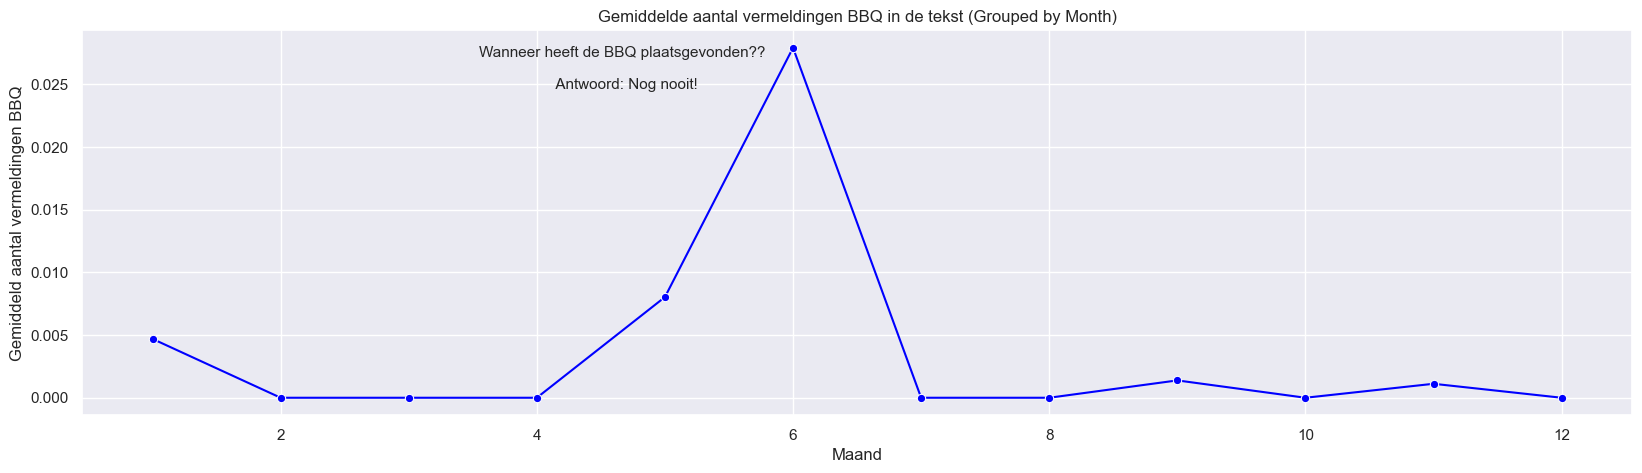

In [48]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def create_bbq_mentions_over_time_plot(df, save_path=None):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract month from timestamp
    df['month'] = df['timestamp'].dt.month

    # Define a regex pattern to search for mentions of "BBQ" or "bbq" in the 'message' column
    bbq_pattern = re.compile(r'\b(?:BBQ|Bbq|bbq|barbecue|barbeque|bbq\'en|bbq\'ing)\b', re.IGNORECASE)

    # Count occurrences of "BBQ" or "bbq" in each message
    df['bbq_mentions'] = df['message'].apply(lambda x: len(bbq_pattern.findall(x)))

    # Group by month and calculate the average number of BBQ mentions
    bbq_mentions_over_time = df.groupby('month')['bbq_mentions'].mean().reset_index()

    # Set the seaborn style
    sns.set(style="darkgrid")

    # Create a line plot using Seaborn
    plt.figure(figsize=(20, 5))
    sns.lineplot(data=bbq_mentions_over_time, x='month', y='bbq_mentions', marker='o', color='blue')

    # Customize the plot
    plt.title('Gemiddelde aantal vermeldingen BBQ in de tekst (Grouped by Month)')
    plt.xlabel('Maand')
    plt.ylabel('Gemiddeld aantal vermeldingen BBQ')

    plt.annotate('Wanneer heeft de BBQ plaatsgevonden?? \n \n Antwoord: Nog nooit!', xy=(6, 4.5), xytext=(0.35, 0.9),
                 xycoords='axes fraction', textcoords='axes fraction',
                 fontsize=11, ha='center', va='center')
    
    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()


# Example usage:
# Assuming 'df' is your DataFrame
create_bbq_mentions_over_time_plot(df, save_path='img/bbq_mentions_over_time_plot.png')


In [75]:
def create_bbq_mentions_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract month, year, and author from timestamp
    df['month'] = df['timestamp'].dt.month
    df['year'] = df['timestamp'].dt.year

    # Define a regex pattern to search for mentions of "BBQ" or "bbq" in the 'message' column
    bbq_pattern = re.compile(r'\b(?:BBQ|Bbq|bbq|barbecue|barbeque|bbq\'en|bbq\'ing)\b', re.IGNORECASE)

    # Count occurrences of "BBQ" or "bbq" in each message
    df['bbq_mentions'] = df['message'].apply(lambda x: len(bbq_pattern.findall(x)))

    # Group by year, month, and calculate the total number of BBQ mentions
    bbq_mentions_over_time = df.groupby(['year'])['bbq_mentions'].sum().reset_index()

    # Create a line plot using Plotly Express
    fig = px.line(bbq_mentions_over_time, x='year', y='bbq_mentions', 
                  labels={'bbq_mentions': 'Number of BBQ Mentions'},
                  template='plotly_dark', title='BBQ Mentions per year',
                  category_orders={'year': list(range(2017, 2024))})

    # Customize the figure
    fig.update_layout(
        xaxis=dict(title='Month'),
        yaxis=dict(title='Number of BBQ Mentions'),
        showlegend=True
    )

    return fig


# Example usage:
# Assuming 'df' is your DataFrame
fig = create_bbq_mentions_over_time_plot(df)
fig.show()

In [46]:
def create_delta_messages_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract year and author from timestamp
    df['year'] = df['timestamp'].dt.year

    # Calculate the total number of messages per author for each year
    messages_per_author = df.groupby(['year', 'author'])['message'].count().reset_index()

    # Pivot the DataFrame to have years as columns and authors as rows
    messages_pivot = messages_per_author.pivot_table(values='message', index='author', columns='year', fill_value=0).reset_index()

    # Calculate the delta (difference) in messages between the current year and the previous year for each author
    messages_pivot['delta_messages'] = messages_pivot[df['year'].max()] - messages_pivot[df['year'].max() - 1]

    # Reshape the DataFrame for line plot
    delta_messages_over_time = messages_pivot.melt(id_vars=['author', 'delta_messages'], var_name='year', value_name='messages')

    # Create a line plot using Plotly Express
    fig = px.line(delta_messages_over_time, x='year', y='messages', color='author',
                  line_group='author', labels={'messages': 'Delta Messages'},
                  template='plotly_dark', title='Delta Messages per Author Over Time')

    # Customize the figure
    fig.update_layout(
        xaxis=dict(title='Year'),
        yaxis=dict(title='Delta Messages'),
        showlegend=True
    )

    return fig

# Example usage:
# Assuming 'df' is your DataFrame
fig = create_delta_messages_over_time_plot(df)
fig.show()

In [58]:
def create_delta_messages_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract year and author from timestamp
    df['year'] = df['timestamp'].dt.year

    # Filter the DataFrame for authors excluding those whose names start with "+31"
    df = df[~df['author'].str.startswith('+31')]

    # Calculate the total number of messages per author for each year
    messages_per_author = df.groupby(['year', 'author'])['message'].count().reset_index()

    # Print the messages_per_author DataFrame for debugging
    print("messages_per_author:")
    print(messages_per_author)

    # Pivot the DataFrame to have years as columns and authors as rows
    messages_pivot = messages_per_author.pivot_table(values='message', index='author', columns='year', fill_value=0).reset_index()

    # Print the messages_pivot DataFrame for debugging
    print("\nmessages_pivot with delta_messages:")
    print(messages_pivot.head(100).to_string(index=False))

    # Calculate the delta (difference) in messages between the current year and the previous year for each author
    messages_pivot['delta_messages'] = messages_pivot[df['year'].max()] - messages_pivot[df['year'].max() - 1]


    # Reshape the DataFrame for line plot
    delta_messages_over_time = messages_pivot.melt(id_vars=['author', 'delta_messages'], var_name='year', value_name='messages')

    # Create a line plot using Plotly Express
    fig = px.line(delta_messages_over_time, x='year', y='messages', color='author',
                  line_group='author', labels={'messages': 'Delta Messages'},
                  template='plotly_dark', title='Delta Messages per Author Over Time')

    # Customize the figure
    fig.update_layout(
        xaxis=dict(title='Year'),
        yaxis=dict(title='Delta Messages'),
        showlegend=True
    )

    return fig

# Example usage:
# Assuming 'df' is your DataFrame
fig = create_delta_messages_over_time_plot(df)
fig.show()

messages_per_author:
     year             author  message
0    2017            Unknown        1
1    2018         Bryan Bibo       33
2    2018      Bryan Zaagsma      154
3    2018              Falco       66
4    2018       Jeroen Huter       34
..    ...                ...      ...
100  2024       Romano Mundo       17
101  2024  Ruben Zaalvoetbal       16
102  2024          Tom Danko       28
103  2024       Tom Schokker        4
104  2024            Unknown        3

[105 rows x 3 columns]

messages_pivot with delta_messages:
                author  2017  2018  2019  2020  2021  2022  2023  2024
     Belly Zaalvoetbal   0.0   0.0   0.0   0.0   0.0   4.0 107.0  13.0
            Bryan Bibo   0.0  33.0 185.0 166.0  51.0  57.0  54.0   5.0
         Bryan Zaagsma   0.0 154.0 308.0 334.0 201.0 266.0 394.0  98.0
           Casper Guit   0.0   0.0   5.0  41.0  50.0  81.0  79.0  13.0
                 Falco   0.0  66.0 290.0 158.0 134.0 118.0  90.0  40.0
          Jeroen Huter   0.0  34.0  

In [60]:
def create_delta_messages_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract year and author from timestamp
    df['year'] = df['timestamp'].dt.year

    # Filter the DataFrame for authors excluding those whose names start with "+31"
    filtered_df = df[~df['author'].str.startswith('+31')]

    # Calculate the total number of messages per author for each year
    messages_per_author = filtered_df.groupby(['year', 'author'])['message'].count().reset_index()

    # Pivot the DataFrame to have years as columns and authors as rows
    messages_pivot = messages_per_author.pivot_table(values='message', index='author', columns='year', fill_value=0).reset_index()

    # Calculate the differences between consecutive years
    for year in range(2018, 2023):
        messages_pivot[year + 1] -= messages_pivot[year]

    # Reshape the DataFrame for line plot
    delta_messages_over_time = messages_pivot.melt(id_vars=['author'], var_name='year', value_name='delta_messages')

    # Create a line plot using Plotly Express
    fig = px.line(delta_messages_over_time, x='year', y='delta_messages', color='author',
                  line_group='author', labels={'delta_messages': 'Delta Messages'},
                  template='plotly_dark', title='Delta Messages per Author Over Time')

    # Customize the figure
    fig.update_layout(
        xaxis=dict(title='Year'),
        yaxis=dict(title='Delta Messages'),
        showlegend=True
    )

    return fig

# Example usage:
# Assuming 'df' is your DataFrame
fig = create_delta_messages_over_time_plot(df)
fig.show()

In [65]:
def create_normalized_percentage_change_messages_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract year and author from timestamp
    df['year'] = df['timestamp'].dt.year

    # Filter the DataFrame for authors excluding those whose names start with "+31"
    filtered_df = df[~df['author'].str.startswith('+31')]

    # Calculate the total number of messages per author for each year
    messages_per_author = filtered_df.groupby(['year', 'author'])['message'].count().reset_index()

    # Pivot the DataFrame to have years as columns and authors as rows
    messages_pivot = messages_per_author.pivot_table(values='message', index='author', columns='year', fill_value=0).reset_index()

    # Calculate the differences between consecutive years
    for year in range(2018, 2023):
        messages_pivot[year + 1] -= messages_pivot[year]

    # Normalize the delta_messages values to percentages relative to the total messages of the previous year
    for year in range(2019, 2024):
        messages_pivot[year] = (messages_pivot[year] / messages_pivot[year - 1]) * 100

    print(messages_pivot)
    # Reshape the DataFrame for line plot
    normalized_percentage_change_over_time = messages_pivot.melt(id_vars=['author'], var_name='year', value_name='percentage_change')

    # Create a line plot using Plotly Express
    fig = px.line(normalized_percentage_change_over_time, x='year', y='percentage_change', color='author',
                  line_group='author', labels={'percentage_change': 'Percentage Change'},
                  template='plotly_dark', title='Normalized Percentage Change in Messages per Author Over Time')

    # Customize the figure
    fig.update_layout(
        xaxis=dict(title='Year'),
        yaxis=dict(title='Normalized Percentage Change'),
        showlegend=True
    )

    return fig

# Example usage:
# Assuming 'df' is your DataFrame
fig = create_normalized_percentage_change_messages_over_time_plot(df)
fig.show()

year                  author  2017   2018        2019        2020  \
0          Belly Zaalvoetbal   0.0    0.0         NaN         NaN   
1                 Bryan Bibo   0.0   33.0  460.606061    3.039474   
2              Bryan Zaagsma   0.0  154.0  100.000000  180.000000   
3                Casper Guit   0.0    0.0         inf    0.000000   
4                      Falco   0.0   66.0  339.393939  -19.446429   
5               Jeroen Huter   0.0   34.0  150.000000  -12.000000   
6         Jeroen Zaalvoetbal   0.0    6.0  683.333333   -1.317073   
7         Justin Velthuijsen   0.0   74.0  385.135135   -7.010526   
8                 Kay Jacobs   0.0   26.0   65.384615   22.941176   
9                 Kerim Ozel   0.0   19.0   94.736842   -5.277778   
10             Kevin Zaagsma   0.0    0.0         NaN         NaN   
11          Mark Zaalvoetbal   0.0    0.0         NaN         NaN   
12    Richard van den Hoogen   0.0    0.0         NaN         NaN   
13              Romano Mundo   0.0